In [134]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# hides warning messages
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
#read data
orders = pd.read_excel('data/muesli_raw_data.xlsx', header=1) #Sonia needs to change the path
#df = pd.read_csv('data/muesli_csv.csv', header=1)
#df = pd.read_csv('/Users/linaperez/downloads/5 - Muesli Project raw data - Orders.csv', header=1) #Sonia needs to change the path
orders.head(2)


,Index,Order ID,Order Date,Ship mode,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit
0,27.0,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3.0,0.0,11.7741
1,45.0,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2.0,0.0,19.7714


In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Index           9994 non-null   float64       
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship mode       9994 non-null   object        
 4   Customer ID     9994 non-null   object        
 5   Customer Name   9994 non-null   object        
 6   Origin Channel  9994 non-null   object        
 7   Country/Region  9994 non-null   object        
 8   City            9994 non-null   object        
 9   State           9994 non-null   object        
 10  Postal Code     9983 non-null   float64       
 11  Region          9994 non-null   object        
 12  Category        9994 non-null   object        
 13  Sub-Category    9994 non-null   object        
 14  Product ID      9994 non-null   object        
 15  Sale

In [4]:
#clean orders df
orders.columns = orders.columns.str.lower()
orders.columns = orders.columns.str.replace(" ","_")
orders.head(2)

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country/region,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
0,27.0,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3.0,0.0,11.7741
1,45.0,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2.0,0.0,19.7714


In [5]:
#create arrival df
arrival= pd.read_excel('data/muesli_raw_data.xlsx', sheet_name='Campaign Data')

#clean arrival df
arrival.columns = arrival.columns.str.lower()
arrival.columns = arrival.columns.str.replace(" ","_")
arrival.head(2)

,order_id,arrival_scan_date,customer_name
0,CA-2019-109666,2019-05-03,Kunst Miller
1,CA-2019-138933,2019-05-03,Jack Lebron


In [6]:
arrival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           333 non-null    object        
 1   arrival_scan_date  333 non-null    datetime64[ns]
 2   customer_name      333 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 7.9+ KB


In [7]:
#create truck df
truck = pd.read_excel('data/muesli_raw_data.xlsx', sheet_name='Order Process Data')

#clean truck df
truck.columns = truck.columns.str.lower()
truck.columns = truck.columns.str.replace(" ","_")
truck.head(2)

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
0,3074.0,CA-2019-125206,2019-01-03,2019-01-07,Express
1,4919.0,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing


In [8]:
truck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   row_id              5899 non-null   float64       
 1   order_id            5899 non-null   object        
 2   order_date          5899 non-null   datetime64[ns]
 3   on_truck_scan_date  5899 non-null   datetime64[ns]
 4   ship_mode           5899 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 230.6+ KB


In [9]:
#create ready_pickup df
ready_pickup = pd.read_excel('data/muesli_raw_data.xlsx', sheet_name='InternData Study')

#clean ready_pickup df
ready_pickup.columns = ready_pickup.columns.str.lower()
ready_pickup.columns = ready_pickup.columns.str.replace(" ","_")
ready_pickup.head(2)

,order_id,ready_to_ship_date,pickup_date
0,CA-2019-116540,2019-09-02,2019-09-03
1,CA-2019-116540,2019-09-02,2019-09-03


In [10]:
ready_pickup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            290 non-null    object        
 1   ready_to_ship_date  290 non-null    datetime64[ns]
 2   pickup_date         290 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 6.9+ KB


In [11]:
#joining orders and arrivals = df1
df1= pd.merge(orders, arrival, on= "order_id", how= "inner")
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 667
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              668 non-null    float64       
 1   order_id           668 non-null    object        
 2   order_date         668 non-null    datetime64[ns]
 3   ship_mode          668 non-null    object        
 4   customer_id        668 non-null    object        
 5   customer_name_x    668 non-null    object        
 6   origin_channel     668 non-null    object        
 7   country/region     668 non-null    object        
 8   city               668 non-null    object        
 9   state              668 non-null    object        
 10  postal_code        668 non-null    float64       
 11  region             668 non-null    object        
 12  category           668 non-null    object        
 13  sub-category       668 non-null    object        
 14  product_id

In [12]:
df1.head(2)

,index,order_id,order_date,ship_mode,customer_id,customer_name_x,origin_channel,country/region,city,state,...,region,category,sub-category,product_id,sales,quantity,discount,profit,arrival_scan_date,customer_name_y
0,252.0,CA-2019-145625,2019-09-11,Standard Class,KC-16540,Kelly Collister,Email,United States,San Diego,California,...,West,Special Projects Muesil,Gluten Free,TEC-AC-10003832,3347.37,13.0,0.0,636.0003,2019-09-23,Kelly Collister
1,251.0,CA-2019-145625,2019-09-11,Standard Class,KC-16540,Kelly Collister,Email,United States,San Diego,California,...,West,Power Muesli,Nuts and more,OFF-PA-10004569,7.61,1.0,0.0,3.5767,2019-09-23,Kelly Collister


In [13]:
#TIME BETWEEN ORDER DATE AND THE ARRIVAL TO CUSTOMER

#df1 has order dates and arrivals for the gerneral lead time kpi
df1 = df1[["order_id", "order_date", "arrival_scan_date"]]

#create columns for order dates
df1["order_year"]=df1["order_date"].dt.year
df1["order_month"]=df1["order_date"].dt.month
df1["order_weekday"]=df1["order_date"].dt.dayofweek

#create columns for arrival
df1["arrival_year"]=df1["arrival_scan_date"].dt.year
df1["arrival_month"]=df1["arrival_scan_date"].dt.month
df1["arrival_weekday"]=df1["arrival_scan_date"].dt.dayofweek

#create columns for day difference
df1["day_dif_order"]= (df1["arrival_scan_date"]-df1["order_date"]).dt.days

In [14]:
df1.head()

,order_id,order_date,arrival_scan_date,order_year,order_month,order_weekday,arrival_year,arrival_month,arrival_weekday,day_dif_order
0,CA-2019-145625,2019-09-11,2019-09-23,2019,9,2,2019,9,0,12
1,CA-2019-145625,2019-09-11,2019-09-23,2019,9,2,2019,9,0,12
2,CA-2019-162138,2019-04-23,2019-05-06,2019,4,1,2019,5,0,13
3,CA-2019-162138,2019-04-23,2019-05-06,2019,4,1,2019,5,0,13
4,CA-2019-169166,2019-05-09,2019-05-20,2019,5,3,2019,5,0,11


In [33]:
df1.drop_duplicates().reset_index()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 667
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           668 non-null    object        
 1   order_date         668 non-null    datetime64[ns]
 2   arrival_scan_date  668 non-null    datetime64[ns]
 3   order_year         668 non-null    int64         
 4   order_month        668 non-null    int64         
 5   order_weekday      668 non-null    int64         
 6   arrival_year       668 non-null    int64         
 7   arrival_month      668 non-null    int64         
 8   arrival_weekday    668 non-null    int64         
 9   day_dif_order      668 non-null    int64         
dtypes: datetime64[ns](2), int64(7), object(1)
memory usage: 57.4+ KB


In [16]:
leadtime= df1.groupby("day_dif_order").order_id.count()

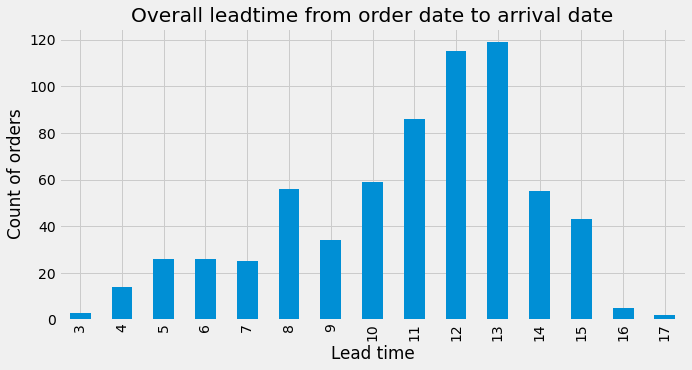

In [135]:
# plotting overall leadtime 
fig, ax = plt.subplots(figsize=(10,5))
(
    df1
    .groupby('day_dif_order')
    .count()['order_id']
    .plot.bar() 
)
ax.set_title('Overall leadtime from order date to arrival date')

ax.set_xlabel('Lead time');
ax.set_ylabel('Count of orders');

In [103]:
#summary statistics for first kpi
#according to company estmation it should take 13 day in the worth case.
df1.describe()["day_dif_order"]

count    668.000000
mean      10.886228
std        2.878174
min        3.000000
25%        9.000000
50%       12.000000
75%       13.000000
max       17.000000
Name: day_dif_order, dtype: float64

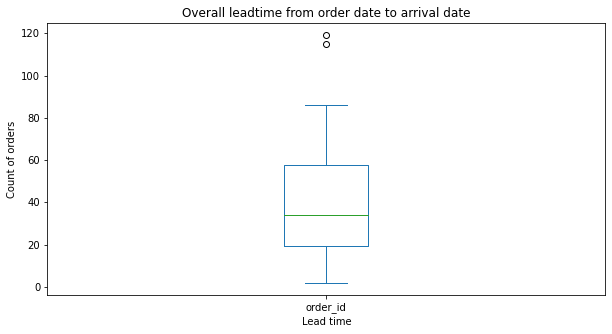

In [104]:
#boxplot to understand the variation of delivary dates
fig, ax = plt.subplots(figsize=(10,5))
(
    df1
    .groupby('day_dif_order')
    .count()['order_id']
    .plot.box() 
)
ax.set_title('Overall leadtime from order date to arrival date')

ax.set_xlabel('Lead time');
ax.set_ylabel('Count of orders');
# according to box plot more than half of orders had the delivery date more then 12 days.
#so muesli company in not working very well based on his estimated delivery time based on the data that we have.

In [51]:
#inspecting duplicates
duplicates_df1 = df1[df1.duplicated(keep=False)].shape
print(f'duplicates for df1: {duplicates_df1[0]}')  #why do we still have 497 duplicates when we cleaned already???? 

duplicates_arrival = arrival[arrival.duplicated(keep=False)].shape
print(f'duplicates for arrival: {duplicates_arrival[0]}')

duplicates_truck = truck[truck.duplicated(keep=False)].shape
print(f'duplicates for truck: {duplicates_truck[0]}')

duplicates_ready_pickup = ready_pickup[ready_pickup.duplicated(keep=False)].shape
print(f'duplicates for ready_pickup: {duplicates_ready_pickup[0]}')
# 147 of 290 rows are duplicated in the ready_pickup df

duplicates for df1: 497
duplicates for arrival: 0
duplicates for truck: 0
duplicates for ready_pickup: 0


In [19]:
truck.head(2)

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
0,3074.0,CA-2019-125206,2019-01-03,2019-01-07,Express
1,4919.0,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing


In [157]:
#TIME BETWEEN ORDER DATE AND LOADING MUESLI ON THE TRUCK

#we don't need to join orders with truck because the 5899 entries already have both the order_date and the truck_date :D

#create columns for order dates
truck["order_year"]=truck["order_date"].dt.year
truck["order_month"]=truck["order_date"].dt.month
truck["order_weekday"]=truck["order_date"].dt.dayofweek

#create columns for on_truck_scan_date
truck["on_truck_year"]=truck["on_truck_scan_date"].dt.year
truck["on_truck_month"]=truck["on_truck_scan_date"].dt.month
truck["on_truck_weekday"]=truck["on_truck_scan_date"].dt.dayofweek

#create columns for day difference
truck['truck_day_dif'] = (truck['on_truck_scan_date'] - truck['order_date']).dt.days

truck.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   row_id              5899 non-null   float64       
 1   order_id            5899 non-null   object        
 2   order_date          5899 non-null   datetime64[ns]
 3   on_truck_scan_date  5899 non-null   datetime64[ns]
 4   ship_mode           5899 non-null   object        
 5   truck_day_dif       5899 non-null   int64         
 6   order_year          5899 non-null   int64         
 7   order_month         5899 non-null   int64         
 8   order_weekday       5899 non-null   int64         
 9   on_truck_year       5899 non-null   int64         
 10  on_truck_month      5899 non-null   int64         
 11  on_truck_weekday    5899 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(7), object(2)
memory usage: 553.2+ KB


In [21]:
# leadtime_muesli is the df for the second KPI
leadtime_muesli = truck.groupby('truck_day_dif').row_id.count()
leadtime_muesli.sort_values(ascending=False)

truck_day_dif
7     1165
8     1022
6      765
5      602
9      565
4      435
3      373
10     318
1      248
2      222
0      152
11      26
12       6
Name: row_id, dtype: int64

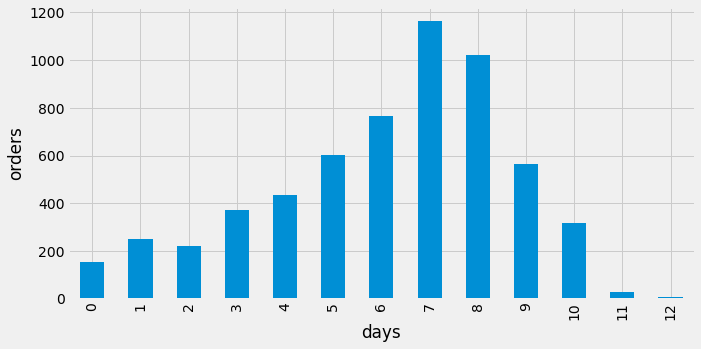

In [156]:
#plotting leadtime_muesli
fig, ax = plt.subplots(figsize=(10,5))
(
    truck
    .groupby('truck_day_dif')
    .count()['row_id']
    .plot.bar() 
)

ax.set_xlabel('days');
ax.set_ylabel('orders');

In [106]:
#summary statistics for the second kpi (order-date and on truck delivery date)
#it should take 6 days at the worse case.
#we have complete data
truck.describe()["truck_day_dif"]

count    5899.000000
mean        6.120529
std         2.509031
min         0.000000
25%         5.000000
50%         7.000000
75%         8.000000
max        12.000000
Name: truck_day_dif, dtype: float64

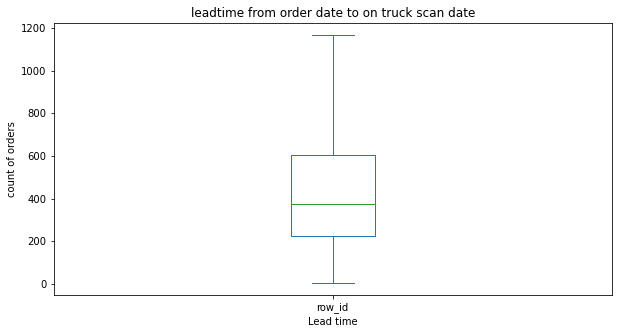

In [107]:
#box plot for second kpi
#here also it takes more than worse case scenario for the orders to be loaded on truck.
#for more than half of orders it takes more that 6 days to be loaded on trucks.
###it seems to be a problem in ready to ship process. 
#### in next step we want to see what happens from ready to ship date and on truck scan date.
fig, ax = plt.subplots(figsize=(10,5))
(
    truck
    .groupby('truck_day_dif')
    .count()['row_id']
    .plot.box() 
)
ax.set_title('leadtime from order date to on truck scan date')

ax.set_xlabel('Lead time');
ax.set_ylabel('count of orders');

In [23]:
# TIME BETWEEN READY TO ship AND BEING LOADED IN THE TRUCK

#join truck and ready_pickup
df3= pd.merge(truck, ready_pickup, on= "order_id", how= "inner")
df3.head()

,row_id,order_id,order_date,on_truck_scan_date,ship_mode,order_year,order_month,order_weekday,on_truck_year,on_truck_month,on_truck_weekday,truck_day_dif,ready_to_ship_date,pickup_date
0,3416.0,CA-2019-116540,2019-09-02,2019-09-03,Express,2019,9,0,2019,9,1,1,2019-09-02,2019-09-03
1,3416.0,CA-2019-116540,2019-09-02,2019-09-03,Express,2019,9,0,2019,9,1,1,2019-09-02,2019-09-03
2,3417.0,CA-2019-116540,2019-09-02,2019-09-03,Express,2019,9,0,2019,9,1,1,2019-09-02,2019-09-03
3,3417.0,CA-2019-116540,2019-09-02,2019-09-03,Express,2019,9,0,2019,9,1,1,2019-09-02,2019-09-03
4,6937.0,CA-2019-129847,2019-09-02,2019-09-04,Express,2019,9,0,2019,9,2,2,2019-09-04,2019-09-04


In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 752
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   row_id              753 non-null    float64       
 1   order_id            753 non-null    object        
 2   order_date          753 non-null    datetime64[ns]
 3   on_truck_scan_date  753 non-null    datetime64[ns]
 4   ship_mode           753 non-null    object        
 5   order_year          753 non-null    int64         
 6   order_month         753 non-null    int64         
 7   order_weekday       753 non-null    int64         
 8   on_truck_year       753 non-null    int64         
 9   on_truck_month      753 non-null    int64         
 10  on_truck_weekday    753 non-null    int64         
 11  truck_day_dif       753 non-null    int64         
 12  ready_to_ship_date  753 non-null    datetime64[ns]
 13  pickup_date         753 non-null    datetime64[ns]

In [38]:
# lead time from on truck scan date and ready to ship date
df3['ready_to_ship_on_truck_dif'] = (df3['on_truck_scan_date'] - df3['ready_to_ship_date']).dt.days
df3.head()

,row_id,order_id,order_date,on_truck_scan_date,ship_mode,order_year,order_month,order_weekday,on_truck_year,on_truck_month,on_truck_weekday,truck_day_dif,ready_to_ship_date,pickup_date,ontruck_ready_to_ship_dif,ready_to_ship_on_truck_dif
0,3416.0,CA-2019-116540,2019-09-02,2019-09-03,Express,2019,9,0,2019,9,1,1,2019-09-02,2019-09-03,1,1
1,3416.0,CA-2019-116540,2019-09-02,2019-09-03,Express,2019,9,0,2019,9,1,1,2019-09-02,2019-09-03,1,1
2,3417.0,CA-2019-116540,2019-09-02,2019-09-03,Express,2019,9,0,2019,9,1,1,2019-09-02,2019-09-03,1,1
3,3417.0,CA-2019-116540,2019-09-02,2019-09-03,Express,2019,9,0,2019,9,1,1,2019-09-02,2019-09-03,1,1
4,6937.0,CA-2019-129847,2019-09-02,2019-09-04,Express,2019,9,0,2019,9,2,2,2019-09-04,2019-09-04,0,0


In [26]:
df3['ontruck_ready_to_ship_dif'].value_counts()
#leadtime_muesli = df3.groupby('ontruck_ready_to_ship_dif').order_id.count()

2    308
3    177
1    174
0     94
Name: ontruck_ready_to_ship_dif, dtype: int64

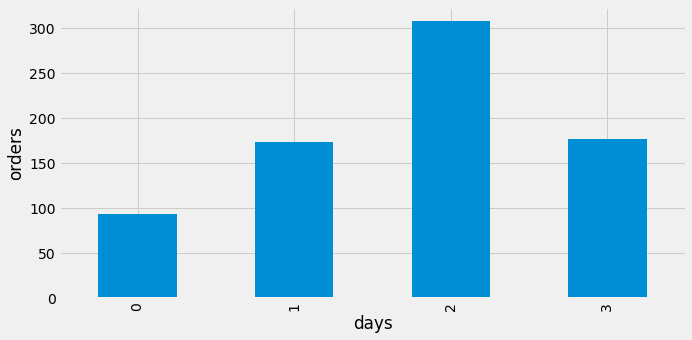

In [151]:
# plotting leadtime from ready to ship date to on truck scan date
fig, ax = plt.subplots(figsize=(10,5))
(
    df3
    .groupby('ontruck_ready_to_ship_dif')
    .count()['order_id']
    .plot.bar()
    
)
ax.set_xlabel('days');
ax.set_ylabel('orders');

In [110]:
#we have less data here.
## according to campany estimation it should take 3 days at the worth case.
##they are working good based on the data that we have. so there should be a problem
#proccessing the orders in warehouse. company needs to have more inspectors to see what
#happens in warehouse.
df3.describe()["ontruck_ready_to_ship_dif"]

count    753.000000
mean       1.754316
std        0.952005
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: ontruck_ready_to_ship_dif, dtype: float64

In [28]:
#groupby standard and express delivery
df3.loc[df3["ship_mode"]=="Express",'ontruck_ready_to_ship_dif'].sort_values().value_counts()

0    94
1    56
2     1
Name: ontruck_ready_to_ship_dif, dtype: int64

In [76]:
ready_pickup.head(2)

,order_id,ready_to_ship_date,pickup_date
0,CA-2019-116540,2019-09-02,2019-09-03
1,CA-2019-129847,2019-09-04,2019-09-04


In [77]:
arrival.head(2)

,order_id,arrival_scan_date,customer_name
0,CA-2019-109666,2019-05-03,Kunst Miller
1,CA-2019-138933,2019-05-03,Jack Lebron


In [ ]:
# #TIME BETWEEN READY TO SHIP AND THE ARRIVAL DATE -> THIRD KPI

# #join ready_pickup and arrival -> arrival has 290 and pickup 333, but ready to pickup has duplicates -> 
# #first drop the duplicates from ready_pickup
# ready_pickup.drop_duplicates(inplace=True, ignore_index=True)
# #ready_pickup.info() # 204 rows

# #df4 = pd.concat([ready_pickup, arrival], axis=1)
# df4 = pd.merge(ready_pickup, arrival, on= "order_id", how= "inner")
# df4.info()


In [64]:
# # lead time from ready to pick date and arrival date
# df4['arrival_ready_to_pick_dif'] = (df4['arrival_scan_date'] - df4['ready_to_ship_date']).dt.days
# df4.head(2)

,order_id,ready_to_ship_date,pickup_date,arrival_scan_date,customer_name,arrival_ready_to_pick_dif
0,CA-2019-129847,2019-09-04,2019-09-04,2019-09-10,Tom Ashbrook,6
1,CA-2019-129630,2019-09-04,2019-09-04,2019-09-09,Ionia McGrath,5


In [ ]:
# df4['arrival_ready_to_pick_dif'].value_counts()

In [ ]:
# #plotting lead time from ready to pick date and arrival date
# fig, ax = plt.subplots(figsize=(10,5))
# (
#     df4
#     .groupby('arrival_ready_to_pick_dif')
#     .count()['order_id']
#     .plot.bar() 
# )
# ax.set_title('lead time from ready to pick date and arrival date')

# ax.set_xlabel('Lead time');
# ax.set_ylabel('count of orders');


In [158]:
#lead time between on truck scan date and arrival scan date.
shipment = pd.merge(truck, arrival, on="order_id", how= "right")
shipment["on_truck_arrival_diff"]= (shipment["arrival_scan_date"] - shipment["on_truck_scan_date"]).dt.days
#shipment.groupby("order_id").count()["on_truck_arrival_diff"]
shipment["on_truck_arrival_diff"].value_counts()
shipment.describe()


,row_id,truck_day_dif,order_year,order_month,order_weekday,on_truck_year,on_truck_month,on_truck_weekday,on_truck_arrival_diff
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,4895.901198,6.324850,2019.184132,7.507485,2.799401,2019.220060,7.305389,2.176647,4.561377
std,2989.513912,2.576129,0.387882,3.440861,2.010139,0.414597,3.537272,1.240953,1.208716
min,1.000000,0.000000,2019.000000,1.000000,0.000000,2019.000000,1.000000,0.000000,1.000000
25%,2170.750000,5.000000,2019.000000,5.000000,1.000000,2019.000000,5.000000,2.000000,4.000000
50%,4949.000000,7.000000,2019.000000,9.000000,3.000000,2019.000000,9.000000,2.000000,5.000000
75%,7522.250000,8.000000,2019.000000,11.000000,4.000000,2019.000000,10.250000,2.000000,5.000000
max,9987.000000,12.000000,2020.000000,12.000000,6.000000,2020.000000,12.000000,4.000000,7.000000


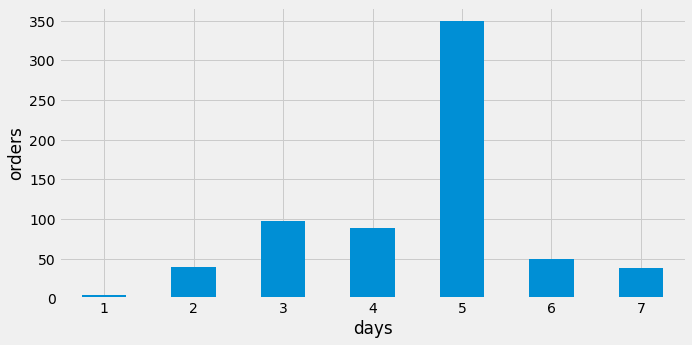

In [155]:
fig, ax = plt.subplots(figsize=(10,5))
(
    shipment
    .groupby("on_truck_arrival_diff")
    .count()['order_id']
    .plot.bar(rot=360) 
)

ax.set_xlabel('days');
ax.set_ylabel('orders');

In [128]:
#summary statistics
#according to campany estimation it should take about 5 days.
# orders are arriving at costumers on avarage in less than 4 days so delivery company is working
#good on avarage
shipment.describe()["on_truck_arrival_diff"]


count    668.000000
mean       4.561377
std        1.208716
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        7.000000
Name: on_truck_arrival_diff, dtype: float64

In [ ]:
orders[""]